# Algorithms for Genomic Data Science--Week 1 Exercises

#### Question 1
How many times does 'AGGT' or its reverse complement 'ACCT' occur in the lambda virus genome? 
E.g. if 'AGGT' occurs 10 times and 'ACCT' occurs 12 times, you should report 22.

In [2]:
def PatternCount(T, P):
    count = 0
    for i in range(0, (abs(len(T))-abs(len(P)))): #if using with symbol array + 1
        if T[i:i+len(P)]==P:
            count += 1
    return count

In [3]:
def reverseComplement(s):
    complement = {'A':'T', 'C':'G', 'G':'C', 'T':'A', 'N':'N', 'a':'t', 'c':'g', 't':'a', 'n':'n'}
    t = ''
    for base in s:
        t = complement[base] + t
    return t

In [4]:
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

In [5]:
genome = readGenome('lambda_virus.fa')

In [6]:
T = genome
P = 'AGGT'
print(PatternCount(T, P))

150


In [7]:
T = genome
P = reverseComplement('AGGT')
print(PatternCount(T, P))

156


#### Question 2
How many times does 'TTAA' or its reverse complement occur in the lambda virus genome?

In [39]:
T = genome
P = "TTAA"
print(PatternCount(T, P))

195


In [40]:
T = genome
P = reverseComplement("TTAA")
print(PatternCount(T, P))

195


#### Question 3
What is the offset of the leftmost occurrence of 'ACTAAGT' or its reverse complement in the Lambda virus genome? 
E.g. if the leftmost occurrence of 'ACTAAGT' is at offset 40 (0-based) and the leftmost occurrence of its reverse complement 'ACTTAGT' is at offset 29, then report 29.

In [10]:
def naive(p,t):    #where p = pattern and t = text
    occurrences = []
    for i in range(len(t) - len(p) + 1): # loop over alignments
        match = True
        for j in range(len(p)): # loop over characters
            if t[i+j] != p[j]:  # compare characters
                match = False   # mismatch; reject alignment
                break           
        if match:
            occurrences.append(i) # all characters matched; record
    return occurrences

In [11]:
P = 'ACTAAGT'
T = genome
print(naive(P, T))

[27733, 45382]


In [12]:
print(naive(reverseComplement(P), T))

[26028]


#### Question 4
What is the offset of the leftmost occurrence of 'AGTCGA' or its reverse complement in the Lambda virus genome?

In [13]:
P = "AGTCGA"
T = genome
print(naive(P, T))

[18005, 23320, 33657, 44806]


In [14]:
print(naive(reverseComplement(P), T))

[450, 1908, 2472, 41927, 45369]


#### Question 5
As we will discuss, sometimes we would like to find approximate matches for P in T. That is, we want to find occurrences with one or more differences.

For Questions 5 and 6, make a new version of the "naive" function called "naive_2mm" that allows up to 2 mismatches per occurrence. Unlike for the previous questions, do not consider the reverse complement here. We're looking for approximate matches for P itself, not its reverse complement.

How many times does "TTCAAGCC" occur in the Lambda virus genome when allowing up to 2 mismatches?

In [15]:
def HammingDistance(p, q):
    count = 0
    for i, j in zip(p, q):
        if i != j:
            count += 1
    return count

In [16]:
def ApproximatePatternMatching(Text, Pattern, d):
    positions = []
    for i in range(len(Text)-len(Pattern) + 1):
        if HammingDistance(Text[i:i+len(Pattern)], Pattern) <= d:
            positions.append(i)
    return positions

In [17]:
T = genome
P = 'TTCAAGCC'
d = 2
print(ApproximatePatternMatching(T, P, d))

[45, 418, 656, 776, 975, 1311, 1346, 3166, 3265, 3292, 3544, 4237, 4378, 4481, 4518, 5240, 5369, 5597, 5773, 5871, 5971, 6350, 6365, 6564, 6572, 6684, 6731, 6764, 6765, 6929, 7026, 7487, 7783, 7790, 8222, 8251, 8284, 8749, 9078, 9197, 9506, 9942, 10734, 10969, 11211, 11331, 11453, 11640, 11973, 12711, 13670, 13750, 13884, 14687, 14884, 15745, 16293, 16817, 17107, 17349, 17541, 17779, 17838, 18792, 19067, 19719, 19779, 21614, 21854, 22174, 22462, 22722, 22956, 23126, 23522, 23677, 23683, 23820, 23885, 24369, 24584, 24787, 25116, 25554, 26046, 26665, 26887, 27237, 27258, 28166, 28276, 28531, 28639, 28920, 28963, 29021, 29144, 29733, 29921, 30176, 30278, 30362, 30395, 30536, 30721, 30967, 31049, 31379, 31449, 31474, 31482, 31641, 31732, 31749, 31829, 31867, 31872, 32523, 32640, 32754, 32779, 32857, 32977, 33079, 33107, 33371, 33403, 33653, 33686, 33863, 34061, 34194, 34466, 34588, 34733, 34785, 35009, 35156, 35525, 35971, 36074, 36989, 37116, 37241, 37467, 37499, 37505, 37715, 37739, 3777

In [18]:
def ApproximatePatternCount(Text, Pattern, d):
    count = 0
    for i in range(len(Text)-len(Pattern) + 1):
        if HammingDistance(Text[i:i+len(Pattern)], Pattern) <= d:
            count += 1
    return count

In [19]:
print(ApproximatePatternCount(T, P, d))

191


#### Question 6
What is the offset of the leftmost occurrence of 'AGGAGGTT' in the Lambda virus genome when allowing up to 2 mismatches?

In [20]:
T = genome
P = "AGGAGGTT"
d = 2
print(ApproximatePatternMatching(T, P, d))

[49, 282, 299, 302, 380, 1560, 1650, 2235, 2277, 2400, 2562, 2565, 2729, 2823, 3160, 3181, 3946, 4210, 4294, 4309, 4405, 4580, 5069, 5159, 5189, 5231, 5331, 5519, 5737, 5882, 5993, 5996, 6011, 6312, 6522, 6585, 6606, 7316, 7394, 7819, 7904, 7966, 7998, 8534, 8648, 8946, 9339, 9354, 9530, 9842, 9966, 10041, 10250, 10416, 10445, 10484, 10527, 10874, 11193, 11292, 11505, 11568, 11655, 11745, 11838, 12078, 12180, 12222, 12697, 12745, 12819, 12880, 12935, 13011, 13087, 13256, 13415, 13526, 13813, 14259, 15385, 15473, 16192, 17101, 17437, 17755, 17936, 17989, 18016, 18040, 18727, 18853, 18911, 19232, 19263, 19310, 19833, 19929, 19932, 19947, 19980, 20793, 20802, 21305, 21528, 21627, 21684, 22414, 22660, 22670, 22787, 23326, 24063, 24145, 24409, 24595, 24681, 25120, 25139, 25210, 25381, 25384, 25648, 25664, 25773, 25987, 26196, 26208, 26576, 26587, 26653, 26736, 27892, 27967, 28042, 28622, 28840, 28976, 29119, 30029, 30530, 30673, 30902, 31619, 31645, 31682, 31843, 31859, 32069, 33180, 33365,

#### Question 7
This dataset has something wrong with it; one of the sequencing cycles is poor quality.

Report which sequencing cycle has the problem. Remember that a sequencing cycle corresponds to a particular offset in all the reads. For example, if the leftmost read position seems to have a problem consistently across reads, report 0. If the fourth position from the left has the problem, report 3. Do whatever analysis you think is needed to identify the bad cycle. It might help to review the "Analyzing reads by position" video.

In [22]:
def readFastq(filename):
    sequences =[]
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline()
            seq = fh.readline().rstrip()
            fh.readline()
            qual = fh.readline().rstrip()
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities

In [24]:
seqs, quals = readFastq('ERR037900_1.first1000.fastq')

In [25]:
def createHist(qualities):
    hist = [0] * 50
    for qual in qualities:
        for phred in qual:
            q = phred33ToQ(phred)
            hist[q] += 1
    return hist

In [27]:
def phred33ToQ(qual):
    '''Turn Phred+33 ASCII-encoded quality into Q'''
    return ord(qual)-33

In [28]:
h = createHist(quals)
print(h)

[0, 0, 17723, 0, 2, 11, 11, 28, 23, 55, 100, 111, 86, 174, 185, 272, 317, 259, 390, 1523, 2782, 762, 286, 413, 403, 538, 351, 694, 971, 777, 1024, 1449, 1341, 1312, 1916, 2233, 3025, 4043, 6640, 45696, 2074, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

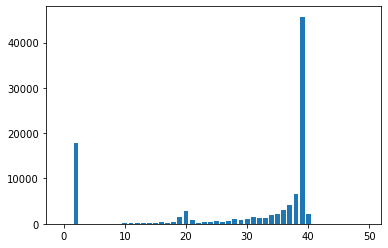

In [30]:
plt.bar(range(len(h)), h)
plt.show()

In [31]:
def findGCByPos(reads):
    gc = [0] * 100
    totals = [0] * 100
    
    for read in reads:
        for i in range(len(read)):
            if read[i] == 'C' or read[i] == 'G':
                gc[i] += 1
            totals[i] += 1
                
    for i in range(len(gc)):
        if totals[i] >0:
            gc[i] /= float(totals[1])
            
    return gc

[0.527, 0.478, 0.489, 0.492, 0.531, 0.537, 0.523, 0.495, 0.51, 0.508, 0.538, 0.529, 0.529, 0.495, 0.491, 0.527, 0.537, 0.534, 0.517, 0.507, 0.493, 0.499, 0.536, 0.536, 0.549, 0.504, 0.506, 0.514, 0.529, 0.524, 0.539, 0.491, 0.499, 0.502, 0.562, 0.534, 0.538, 0.494, 0.492, 0.504, 0.544, 0.53, 0.538, 0.508, 0.513, 0.51, 0.539, 0.539, 0.506, 0.505, 0.524, 0.516, 0.535, 0.542, 0.524, 0.491, 0.542, 0.507, 0.563, 0.525, 0.536, 0.512, 0.541, 0.525, 0.557, 0.528, 0.055, 0.534, 0.516, 0.564, 0.57, 0.526, 0.535, 0.502, 0.534, 0.539, 0.567, 0.539, 0.523, 0.504, 0.567, 0.555, 0.558, 0.545, 0.531, 0.534, 0.568, 0.569, 0.58, 0.55, 0.55, 0.508, 0.553, 0.576, 0.566, 0.585, 0.56, 0.573, 0.582, 0.596]


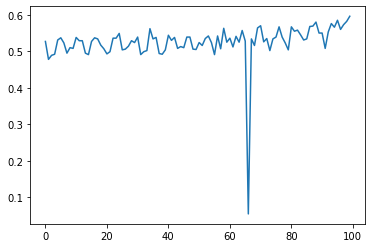

In [32]:
gc = findGCByPos(seqs)
print(gc)
plt.plot(range(len(gc)), gc)
plt.show()

In [34]:
import collections
count = collections.Counter()
for seq in seqs:
    count.update(seq)
print(count)

Counter({'C': 29665, 'A': 24057, 'G': 22888, 'T': 22476, 'N': 914})


In [38]:
gc[66]

0.055